In [3]:
import geopandas as gpd
import rasterio
from rasterio import mask
from shapely.geometry import box

# Read the GeoTIFF file using rasterio
file_path = "Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)

# Define the bounding box to extract the band values
xmin, ymin, xmax, ymax = dataset.bounds

# Create a GeoDataFrame with the band values
geometries = [box(xmin, ymin, xmax, ymax)]
gdf = gpd.GeoDataFrame(geometry=geometries)
gdf.crs = dataset.crs

# Extract the band values within the bounding box
out_image, out_transform = mask.mask(dataset, shapes=gdf.geometry, crop=True)
band_values = out_image[0]

print(band_values)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
pd.DataFrame(band_values).to_csv("/Users/sameertikoo/Downloads/ndvi.csv")

In [ ]:
band_values.shape

In [ ]:
import geopandas as gpd
import rasterio
from rasterio import mask
from shapely.geometry import box
import pandas as pd

# Read the GeoTIFF file using rasterio
file_path = "/Users/sameertikoo/Downloads/MP_ndvi_hosangabad_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)

# Define the bounding box to extract the band values
xmin, ymin, xmax, ymax = dataset.bounds

# Create a GeoDataFrame with the band values
geometries = [box(xmin, ymin, xmax, ymax)]
gdf = gpd.GeoDataFrame(geometry=geometries)
gdf.crs = dataset.crs

# Extract the band values within the bounding box
out_image, out_transform = mask.mask(dataset, shapes=gdf.geometry, crop=True)

# Extract the NIR and red band values
nir_band = out_image[0]
red_band = out_image[1]

# Calculate the NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)
df = pd.DataFrame(ndvi)
print(ndvi)

In [ ]:
df.to_csv("/Users/sameertikoo/Downloads/ndvi.csv")

In [ ]:
import geopandas as gpd
import rasterio
from rasterio import mask
from shapely.geometry import Point

# Read the GeoTIFF file using rasterio
file_path = "/Users/sameertikoo/Downloads/MP_ndvi_hosangabad_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)

# Specify the coordinate of interest
coordinate = (77.39251175698492,22.80746149580315)  # Replace x and y with the desired coordinate

# Create a Point geometry from the coordinate
point = Point(coordinate)

# Create a GeoDataFrame with the point geometry
gdf = gpd.GeoDataFrame(geometry=[point])
gdf.crs = dataset.crs
print(dataset.crs)
# Extract the band values at the specified coordinate
out_image, out_transform = mask.mask(dataset, shapes=gdf.geometry, crop=True)

# Extract the NIR and red band values
nir_band = out_image[0]
red_band = out_image[1]

# Calculate the NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

print(ndvi)


In [ ]:
import rasterio

# Open the GeoTIFF file
file_path = "/Users/sameertikoo/Downloads/MP_ndvi_hosangabad_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)

# Get the number of bands
num_bands = dataset.count
print(num_bands)
dataset
# Iterate over each band
for band_idx in range(1, num_bands + 1):
    # Read the band data
    band_data = band_data.astype('int32')  # Convert to float
    band_data = dataset.read(band_idx)

    # Iterate over each pixel in the band
    for row in range(dataset.height):
        for col in range(dataset.width):
            # Get the pixel value for the current band and coordinates
            pixel_value = band_data[row, col]
            #print(pixel_value,row,col)

            # Do something with the pixel value
            #print(f"Band {band_idx} - Coordinate: ({col}, {row}), Value: {pixel_value}")

# Close the dataset
dataset.close()


In [5]:
import rasterio
import pandas as pd
import numpy as np
# Open the GeoTIFF file
file_path = "Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)
df = pd.DataFrame(np.zeros(dataset.height,dataset.width,len(dataset.indexes)))
df = pd.DataFrame(data, columns=list(dataset.indexes))

TypeError: Cannot interpret '16542' as a data type

In [4]:
import rasterio
import pandas as pd
import numpy as np
# Open the GeoTIFF file
file_path = "Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)
df = pd.DataFrame(np.zeros(dataset.height,dataset.width,len(dataset.indexes)))
df = pd.DataFrame(data, columns=list('ABCDEFGHIJKL'))
df = df.set_index(['latitude', 'longitude'])
# Dynamically update the value of latitude
df.loc[0, 'latitude'] = 10.0
# Dynamically update the value of longitude
df.loc[0, 'longitude'] = 20.0
print(df)

for band in dataset.indexes:
    band_data = dataset.read(band)

    # Iterate over each pixel and retrieve the value
    for row in range(dataset.height):
        for col in range(dataset.width):
            value = band_data[row, col]
            lon, lat = dataset.xy(row, col)
            # Do something with the value (e.g., print or store it)
            
            if value:print(f"For Band {band}: Pixel value at ({col}, {row} ie Lat,Long {lat},{lon}), the NDVI is {value}")

dataset.close()

TypeError: Cannot interpret '16542' as a data type

In [6]:
import rasterio
import pandas as pd
import numpy as np
# Open the GeoTIFF file
file_path = "Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"
dataset = rasterio.open(file_path)

In [7]:
transform = dataset.transform

In [8]:
dataset.read()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
import rasterio
import pandas as pd

def create_dataframe_from_geotiff(geotiff_path):
    # Open the GeoTIFF file
    with rasterio.open(geotiff_path) as src:
        # Get the shape of the raster
        rows, cols = src.shape

        # Get the spatial transform to convert pixel coordinates to coordinates in geographic space
        transform = src.transform

        # Get the pixel values for all bands
        bands = []
        #for band in range(1, src.count + 1):
        print("sdsdsdsdsd--------")
        for band in range(1, 5):
            data = src.read(band)
            bands.append(data)
            print("====",data.shape)
    columns = ['Latitude', 'Longitude'] + [f'Band {band}' for band in range(1, len(bands) + 1)]

    # Create a dataframe
    data = []
    for row in range(rows):
        for col in range(cols):
            # Convert pixel coordinates to latitude and longitude
            lon, lat = transform * (col, row)
            
            # Create a row with latitude, longitude, and band values
            row_data = [lat, lon] + [bands[band-1][row][col] for band in range(1, len(bands) + 1)]
            data.append(row_data)
            print(row,col,row_data)
            df = pd.DataFrame(data, columns=columns)
            df.to_csv("Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped/op.csv", mode='a', index=False, header=False)

    # Define column names
    #columns = ['Latitude', 'Longitude'] + [f'Band {band}' for band in range(1, len(bands) + 1)]

    # Create the dataframe
    #df = pd.DataFrame(data, columns=columns)
    #df.to_csv("/Users/sameertikoo/Downloads/MP_ndvi_hosangabad_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.csv")
    return df



In [10]:
# Usage example
geotiff_file = "./Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped.tif"
create_dataframe_from_geotiff(geotiff_file)



RasterioIOError: ./Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped.tif: No such file or directory

In [8]:
df

NameError: name 'df' is not defined

In [6]:
!conda update -n base -c defaults conda -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/sameertikoo/opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-2.0.2|   py39hecd8cb5_0         268 KB
    conda-package-streaming-0.7.0|   py39hecd8cb5_0          28 KB
    zstandard-0.19.0           |   py39h6c40b1e_0         452 KB
    ------------------------------------------------------------
                                           Total:         748 KB

The following NEW packages will be INSTALLED:

  conda-package-str~ pkgs/main/osx-64::conda-package-streaming-0.7.0-py39hecd8cb5_0
  zstandard          pkgs/main/osx-64::zstandard-0.19.0-py39h6c40b1e_

(12, 8613, 16542)


TypeError: Invalid shape (12, 4307, 8271) for image data

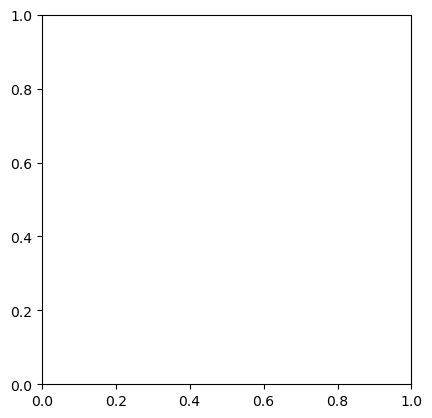

In [12]:
import rasterio
import numpy as np

# Get the path to the GeoTIFF file
#path_to_image = "/Users/sameertikoo/Downloads/Testing geotiff/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped.tif"
path_to_image = "./Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"

# Open the GeoTIFF file
with rasterio.open(path_to_image) as ds:

    # Get the width and height of the image
    width = ds.width
    height = ds.height
    
    # Read the raster data from the rast column
    data = ds.read()
    # Reshape the raster data
    #new_data = np.reshape(data, (6004, 234, 3))
    print(data[:,1:].shape)#.shape,dir(data))
    new_data = new_data = data[:, ::2, ::2]

    # Display the raster data in a new window
    import matplotlib.pyplot as plt
    plt.imshow(new_data)
    plt.show()

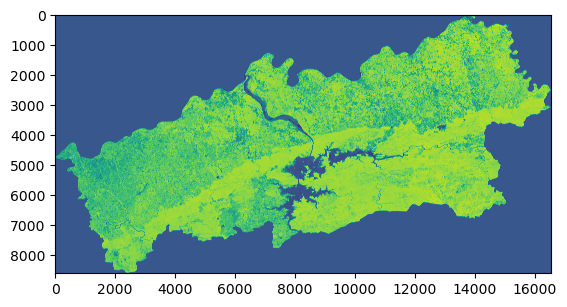

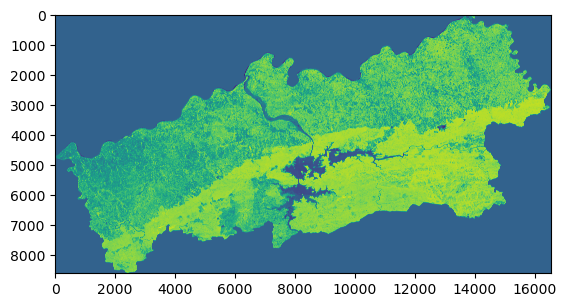

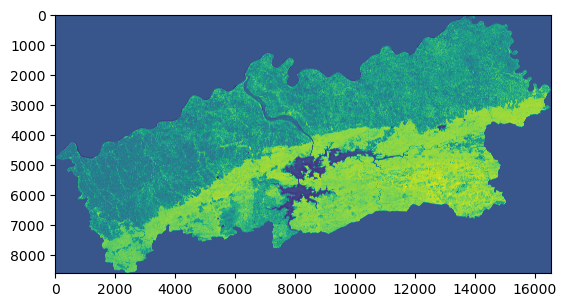

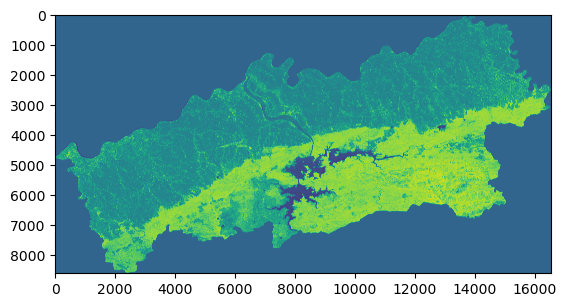

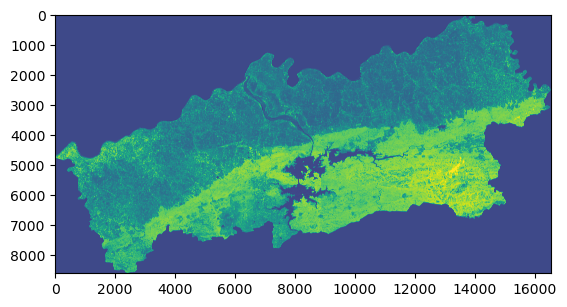

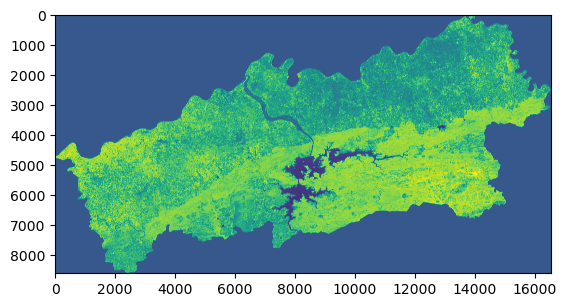

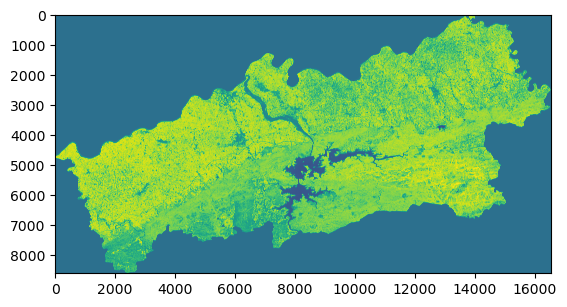

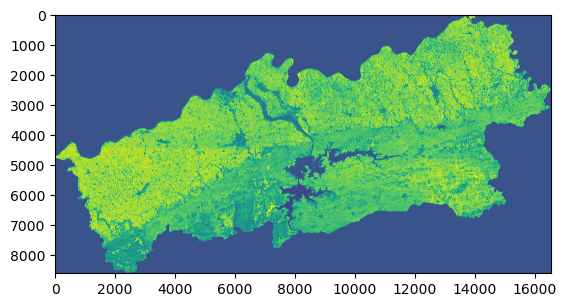

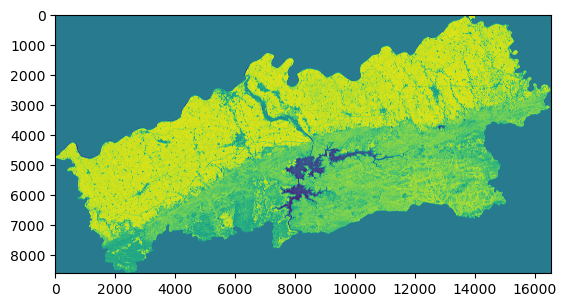

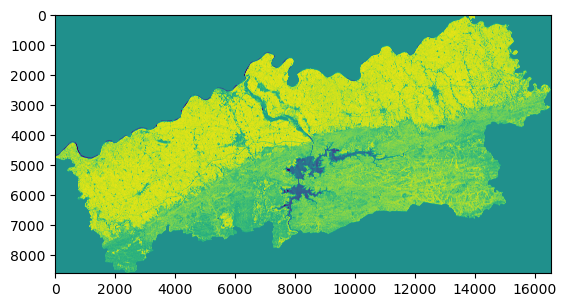

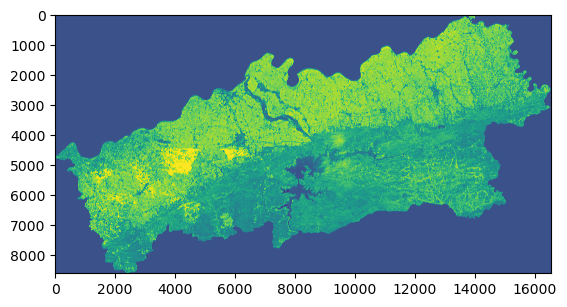

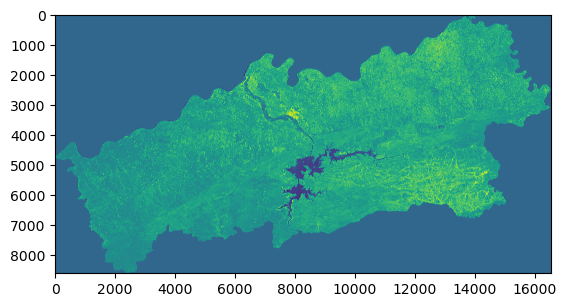

In [13]:
#see multiple bands
path_to_image = "./Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"

import rasterio
import matplotlib.pyplot as plt

with rasterio.open(path_to_image) as ds:
    width = ds.width
    height = ds.height
    count = ds.count  # Number of bands

    # Read all bands of the raster data
    data = ds.read()

    # Display each band separately
    for band in range(count):
        plt.imshow(data[band, :, :])
        plt.show()


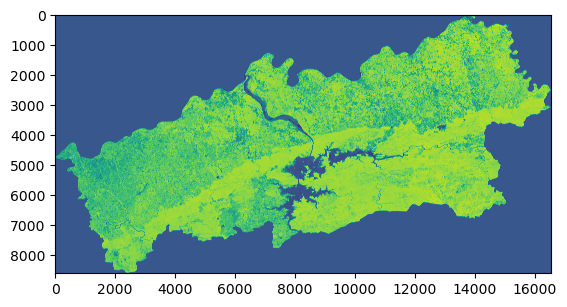

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
#printing data from the whole hoshangabad ndvi
import rasterio
from rasterio.plot import show
path_to_image = "Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"

with rasterio.open(path_to_image) as ds:
    # Read all bands of the raster data
    data = ds.read()

    # Display each band separately
    for band in range(data.shape[0]):
        show(data[band, :, :])
        print(max(data[band, :, :]).all())


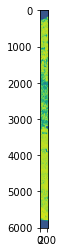

(6004, 234)


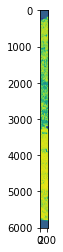

(6004, 234)


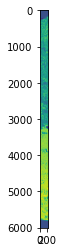

(6004, 234)


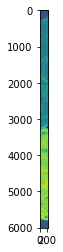

(6004, 234)


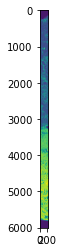

(6004, 234)


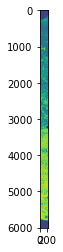

(6004, 234)


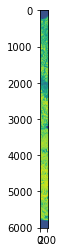

(6004, 234)


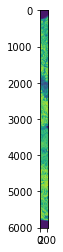

(6004, 234)


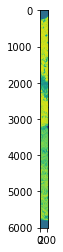

(6004, 234)


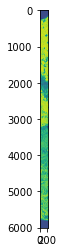

(6004, 234)


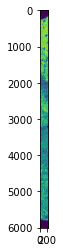

(6004, 234)


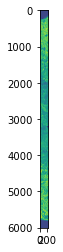

(6004, 234)


In [52]:
#printing data from the truncated hoshangabad ndvi
import rasterio
from rasterio.plot import show
path_to_image = "/Users/sameertikoo/Downloads/Testing geotiff/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23_clipped.tif"

with rasterio.open(path_to_image) as ds:
    # Read all bands of the raster data
    data = ds.read()

    # Display each band separately
    for band in range(data.shape[0]):
        show(data[band, :, :])
        print(data[band, :, :].shape)
        
        

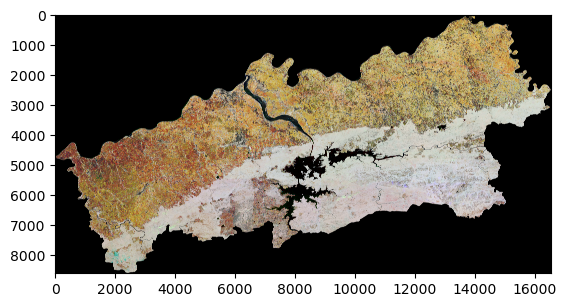

In [16]:
#show composite of all the bands
import rasterio
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open(path_to_image) as ds:
    # Read all bands of the raster data
    data = ds.read()

    # Select the bands for the RGB channels
    red_band = data[0, :, :]
    green_band = data[1, :, :]
    blue_band = data[2, :, :]

    # Create the composite image
    composite = np.stack([red_band, green_band, blue_band], axis=-1)

    # Normalize pixel values to [0, 1]
    composite = composite / np.max(composite)
    composite = np.clip(composite, 0, 1)

    # Display the composite image
    plt.imshow(composite)
    plt.show()




In [1]:
path_to_image = "./Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif"


Latitude,Longitude 22.7857989,78.5369513
Band Values: [746 753 524 434 401 253 449 615 682 664 583 512]


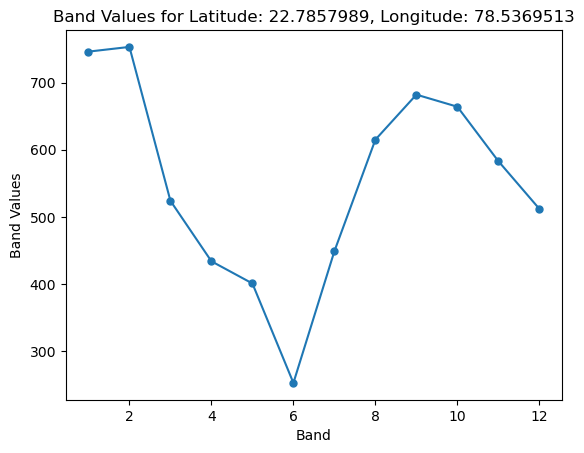

In [4]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open(path_to_image) as ds:
    # Get the affine transformation matrix
    transform = ds.transform

    # Select the latitude and longitude coordinates

    lat = 22.7857989  # Example longitude
    lon = 78.5369513  # Example latitude

    # Convert geographic coordinates to pixel coordinates
    x_pixel, y_pixel = ~transform * (lon, lat)

    # Round the pixel coordinates to integers
    x_pixel = int(round(x_pixel))
    y_pixel = int(round(y_pixel))

    # Read band values at the given pixel coordinates
    band_values = ds.read(window=((y_pixel, y_pixel+1), (x_pixel, x_pixel+1)))
    # Print the latitude, longitude, and band values
    print(f"Latitude,Longitude {lat},{lon}")
    
    
    # Flatten the band values to a 1D array
    band_values = band_values.flatten()
    print(f"Band Values: {band_values}")

    # Create a line chart of the band values with markers
    plt.plot(range(1, 13), band_values, marker='o', markersize=5)  # Assuming 12 bands
    plt.xlabel('Band')
    plt.ylabel('Band Values')
    plt.title('Band Values for Latitude: {}, Longitude: {}'.format(lat, lon))
    plt.show()

In [51]:
def is_valid_pixel(tile,bounds):
    x_pixel,y_pixel=tile
    
    # Define the bounding box to extract the band values
    x_min, y_min =(0,0)
    y_max, x_max = bounds
    
    #Check if pixel lies within the image
    if x_min <= x_pixel <= x_max and y_min <= y_pixel <= y_max:
        return True
    return False

In [52]:

def get_adj_tiles(number_of_tiles,lat,lon):
    
    # Open the GeoTIFF file
    with rasterio.open(path_to_image) as ds:
        
        # Get the affine transformation matrix
        transform = ds.transform
        
        # Convert geographic coordinates to pixel coordinates
        x_pixel, y_pixel = ~transform * (lon, lat)
        
        # Define the directions as a list of tuples
        dir = [(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, -1), (-1, 1), (1, -1)]

        # Initialize the set of visited tiles and insert the starting pixel coordinates
        visited_tiles = {(x_pixel, y_pixel)}

        # Initialize the queue of tiles with the starting pixel coordinates
        tiles = [(x_pixel, y_pixel)]

        # Perform BFS to find adjacent tiles
        for _ in range(number_of_tiles):
            dequeue_size=len(tiles)
            
            for _ in range(dequeue_size):
                x_tile, y_tile = tiles.pop(0)  # Dequeue the front tile

                # Explore the neighbors of the current tile
                for dx, dy in dir:
                    x_neighbor, y_neighbor = x_tile + dx, y_tile + dy
                    neighbor_tile = (x_neighbor, y_neighbor)

                    # Check if the neighbor tile has not been visited
                    if neighbor_tile not in visited_tiles and is_valid_pixel(neighbor_tile,ds.shape) is True:

                        visited_tiles.add(neighbor_tile)  # Mark it as visited
                        tiles.append(neighbor_tile)  # Enqueue the neighbor tile

                        # Convert geographic coordinates to pixel coordinates
                        neighbor_lon, neighbor_lat = transform * neighbor_tile

                        # Read band values at the given pixel coordinates
                        band_values = ds.read(window=((y_neighbor, y_neighbor+1), (x_neighbor, x_neighbor+1)))
                        # Print the latitude, longitude, and band values
                        print(f"Latitude,Longitude {neighbor_lat},{neighbor_lon}")


                        # Flatten the band values to a 1D array
                        band_values = band_values.flatten()
                        print(f"Band Values: {band_values}")

                        # Create a line chart of the band values with markers
                        plt.plot(range(1, 13), band_values, marker='o', markersize=5)  # Assuming 12 bands
                        plt.xlabel('Band')
                        plt.ylabel('Band Values')
                        plt.title('Band Values for Latitude: {}, Longitude: {}'.format(neighbor_lat, neighbor_lon))
                        plt.show()

    

Latitude,Longitude 22.7857989,78.53704113152841
Band Values: [740 753 548 467 452 288 506 644 723 722 635 549]


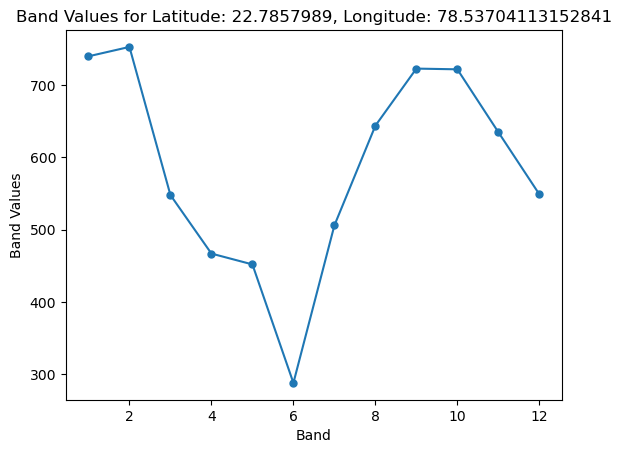

Latitude,Longitude 22.785709068471586,78.5369513
Band Values: [797 765 390 271 248 242 326 437 537 642 576 495]


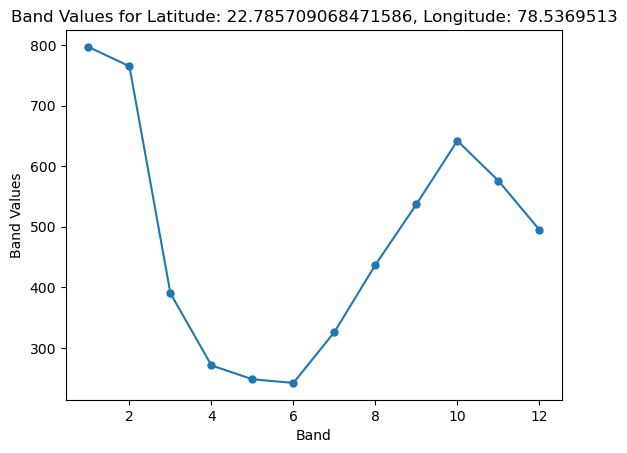

Latitude,Longitude 22.7857989,78.53686146847159
Band Values: [668 665 447 379 345 256 400 512 621 554 545 466]


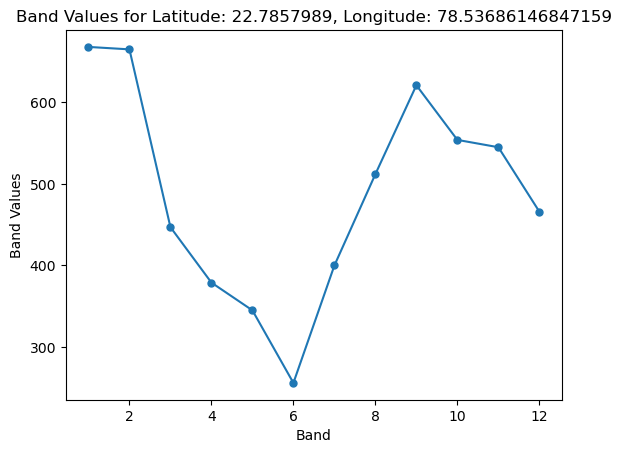

Latitude,Longitude 22.785888731528413,78.5369513
Band Values: [716 708 580 535 470 229 645 801 888 857 816 623]


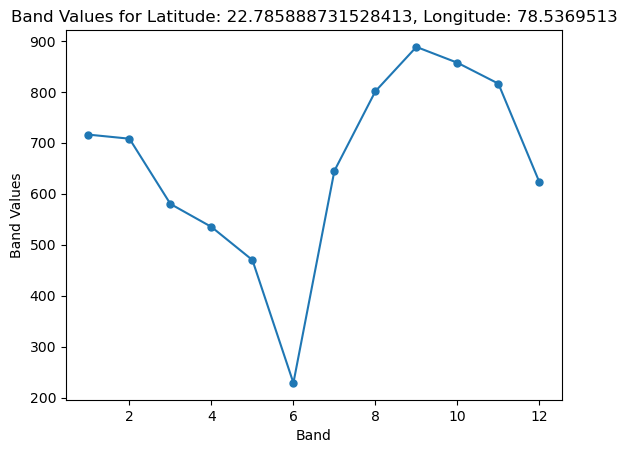

Latitude,Longitude 22.785709068471586,78.53704113152841
Band Values: [776 748 394 299 278 272 330 439 558 643 576 497]


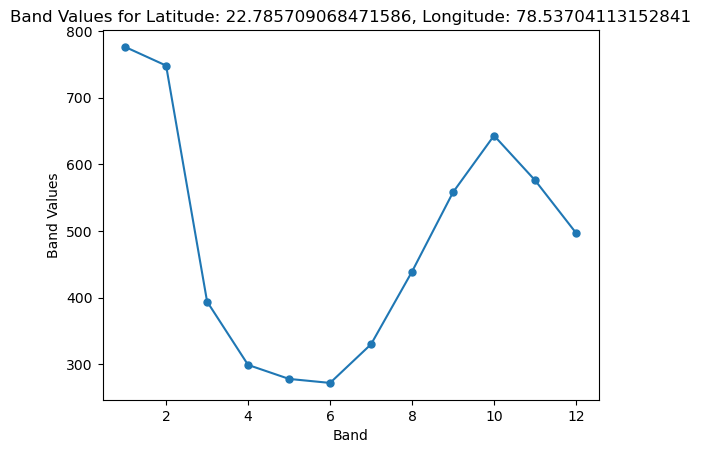

Latitude,Longitude 22.785888731528413,78.53686146847159
Band Values: [665 674 537 480 430 250 539 676 784 759 689 546]


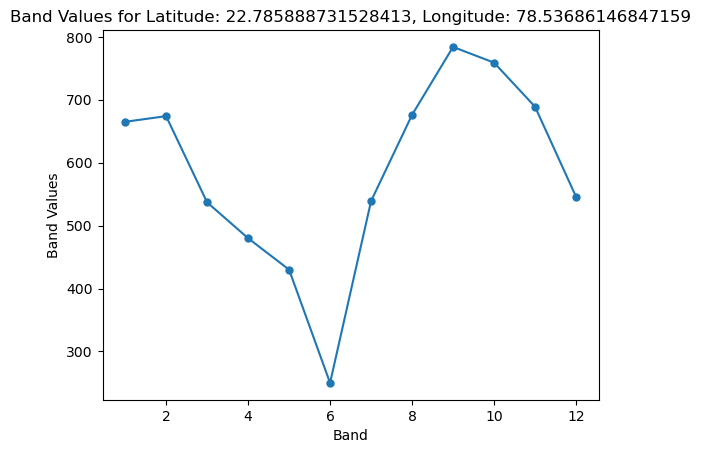

Latitude,Longitude 22.785709068471586,78.53686146847159
Band Values: [747 700 332 290 263 280 316 426 488 523 539 462]


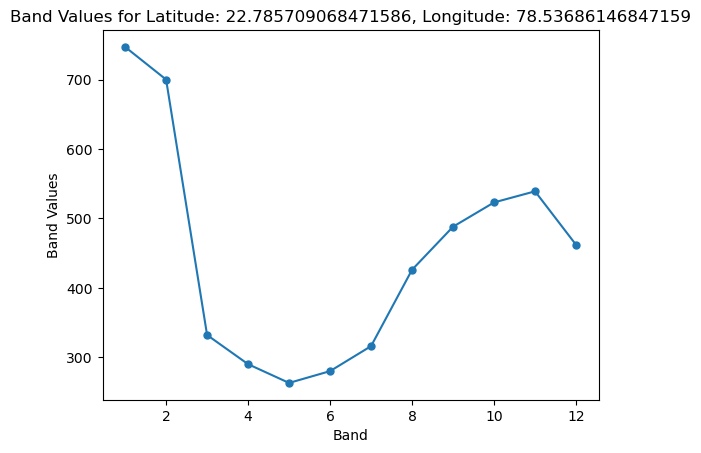

Latitude,Longitude 22.785888731528413,78.53704113152841
Band Values: [717 723 585 536 475 233 640 797 898 893 829 626]


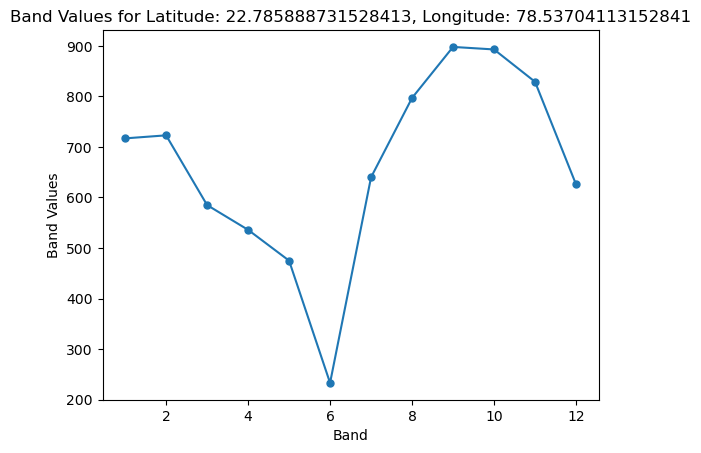

Latitude,Longitude 22.7857989,78.53713096305682
Band Values: [750 755 583 506 477 273 510 652 730 735 676 539]


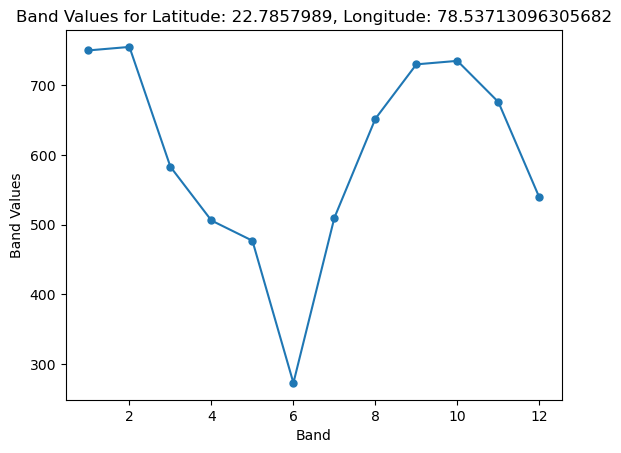

Latitude,Longitude 22.785709068471586,78.53713096305682
Band Values: [769 750 426 323 320 254 322 447 554 622 553 473]


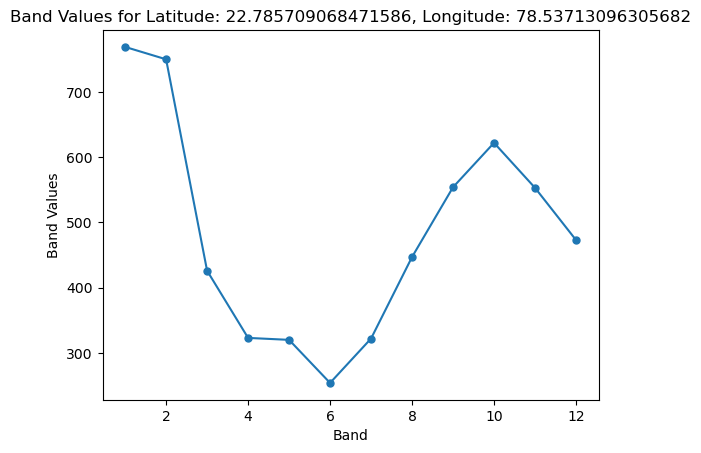

Latitude,Longitude 22.785888731528413,78.53713096305682
Band Values: [721 739 601 557 507 230 648 790 920 921 819 628]


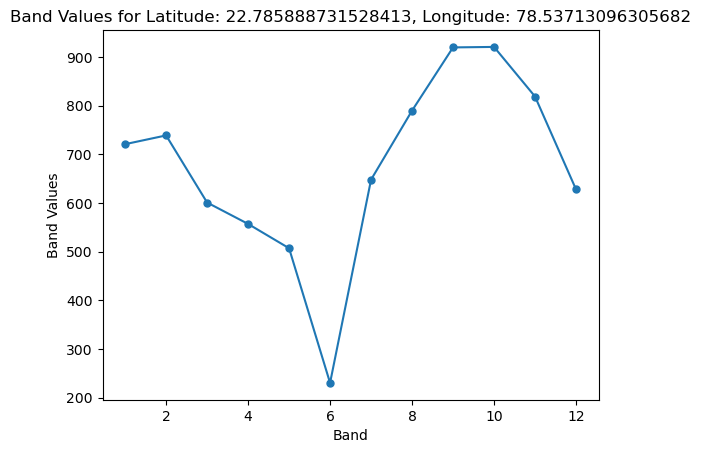

Latitude,Longitude 22.785619236943177,78.5369513
Band Values: [791 752 349 210 224 216 309 429 569 711 651 533]


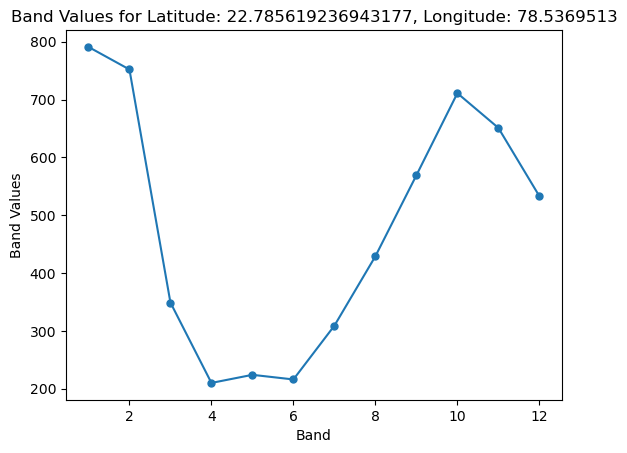

Latitude,Longitude 22.785619236943177,78.53704113152841
Band Values: [780 724 340 213 200 214 290 413 567 704 658 540]


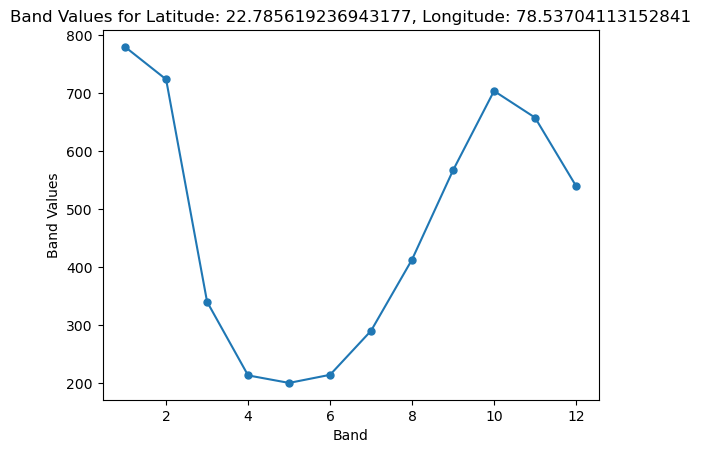

Latitude,Longitude 22.785619236943177,78.53686146847159
Band Values: [770 718 347 297 268 245 314 426 531 586 568 486]


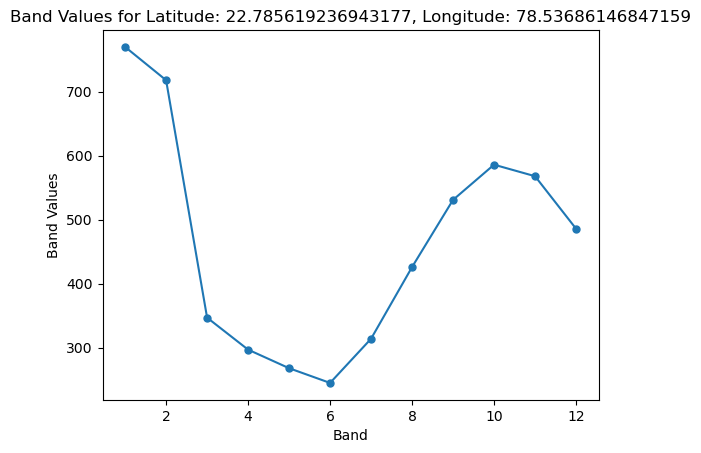

Latitude,Longitude 22.7857989,78.53677163694317
Band Values: [645 649 395 311 297 360 569 600 672 651 573 364]


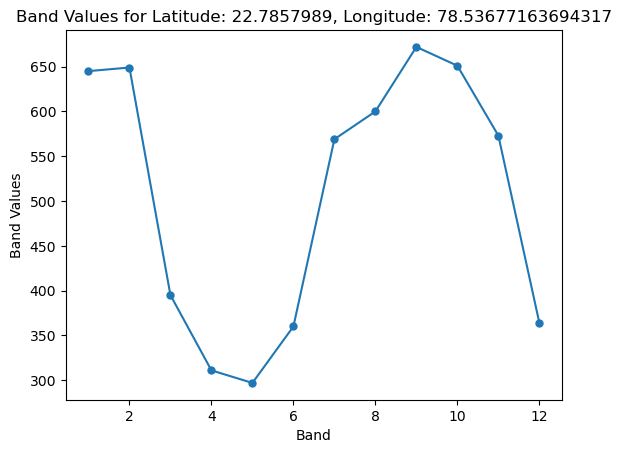

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Get the latitude and longitue of ajacent tiles
get_adj_tiles(2,22.7857989,78.5369513) # number of adjacent tiles to consider,lat,long